In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from wrangle import wrangle_data
from prepare import prepare_zillow
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = prepare_zillow()

#  Model 1 Data
---
Features: bathroomcnt_scaled, bedroomcnt_scaled, calculatedfinishedsquarefeet_scaled 

In [3]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(df, 'taxvaluedollarcnt', modeling=True)

In [4]:
X_train

,parcelid_scaled,bathroomcnt_scaled,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fips_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,propertylandusetypeid_scaled,roomcnt_scaled,yearbuilt_scaled,more_than_two_bath_scaled
2354,0.022496,0.10,0.272727,0.115807,0.297297,0.1,0.007738,0.0,0.428571,0.613139,0.0
16952,0.023723,0.50,0.545455,0.533388,0.297297,0.5,0.017689,0.0,0.000000,0.854015,1.0
10900,0.000500,0.00,0.181818,0.039254,0.000000,0.0,0.004655,0.0,0.000000,0.518248,0.0
12662,0.014754,0.00,0.181818,0.060159,0.000000,0.0,0.005099,0.0,0.000000,0.503650,0.0
16295,0.020910,0.35,0.363636,0.495413,0.297297,0.3,0.015185,0.0,0.500000,0.963504,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2795,0.011441,0.00,0.181818,0.043916,0.000000,0.0,0.003457,0.0,0.000000,0.277372,0.0
7251,0.001041,0.40,0.454545,0.343435,0.000000,0.4,0.016948,0.0,0.000000,0.751825,1.0
12932,0.022897,0.10,0.181818,0.092420,0.297297,0.1,0.003783,0.0,0.357143,0.744526,0.0
14151,0.010198,0.00,0.272727,0.055948,0.000000,0.0,0.003338,0.0,0.000000,0.569343,0.0


In [5]:
df_model_evals = pd.DataFrame()

df_model_evals['y'] = y_train
df_model_evals['baseline_yhat'] = y_train.mean()

rmse_poly = sqrt(mean_squared_error(df_model_evals.y, df_model_evals.baseline_yhat))
rsquared_poly = explained_variance_score(y_train, df_model_evals.baseline_yhat)

print("Baseline Model")
print('-' * 24)
print(f"Basline Model RMSE: {rmse_poly:.2f}")
print(f"Basline R^2: {rsquared_poly:.2%}")

Baseline Model
------------------------
Basline Model RMSE: 729713.45
Basline R^2: 0.00%


In [6]:
df_model_evals.head()

,y,baseline_yhat
2354,544786.0,537011.416246
16952,2449943.0,537011.416246
10900,271191.0,537011.416246
12662,65530.0,537011.416246
16295,11317682.0,537011.416246


In [7]:
# Create a polynomial linear regression
poly = PolynomialFeatures(3)

X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

df_model_evals['poly_1_yhat'] = lm_poly.predict(X_train_poly)

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=3")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=3
------------------------
Polynomial Model RMSE: 464992.57
Polynomial R^2: 59.39%


In [8]:
df_model_evals.head()

,y,baseline_yhat,poly_1_yhat
2354,544786.0,537011.416246,4.970785e+05
16952,2449943.0,537011.416246,2.286260e+06
10900,271191.0,537011.416246,2.715752e+05
12662,65530.0,537011.416246,2.297426e+05
16295,11317682.0,537011.416246,8.660637e+06


In [9]:
lm = LinearRegression().fit(X_train, y_train)

yhat_linear_regression = lm.predict(X_train)

In [10]:
residuals = yhat_linear_regression - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_linear_regression))
rsquared_poly = explained_variance_score(y_train, yhat_linear_regression)

print("Train Set\nLinear Regression")
print('-' * 24)
print(f"Linear Regression Model RMSE: {rmse_poly:.2f}")
print(f"Linear Regression R^2: {rsquared_poly:.2%}")

Train Set
Linear Regression
------------------------
Linear Regression Model RMSE: 559876.99
Linear Regression R^2: 41.13%


#  Model 2
---
Features:

In [11]:
# Create a polynomial linear regression
poly = PolynomialFeatures(3)

X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

In [12]:
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=2")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=2
------------------------
Polynomial Model RMSE: 464992.57
Polynomial R^2: 59.39%


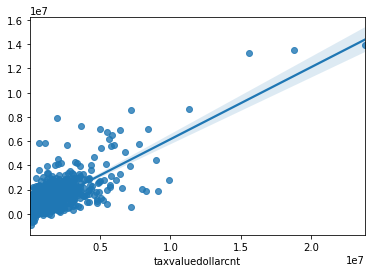

In [13]:
sns.regplot(y_train, yhat_poly_train);

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

yhat_linear_regression = lm.predict(X_train)

residuals = yhat_linear_regression - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_linear_regression))
rsquared_poly = explained_variance_score(y_train, yhat_linear_regression)

print("Train Set\nLinear Regression")
print('-' * 24)
print(f"Linear Regression Model RMSE: {rmse_poly:.2f}")
print(f"Linear Regression R^2: {rsquared_poly:.2%}")

Train Set
Linear Regression
------------------------
Linear Regression Model RMSE: 559876.99
Linear Regression R^2: 41.13%


In [15]:
X_train.head()

,parcelid_scaled,bathroomcnt_scaled,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fips_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,propertylandusetypeid_scaled,roomcnt_scaled,yearbuilt_scaled,more_than_two_bath_scaled
2354,0.022496,0.10,0.272727,0.115807,0.297297,0.1,0.007738,0.0,0.428571,0.613139,0.0
16952,0.023723,0.50,0.545455,0.533388,0.297297,0.5,0.017689,0.0,0.000000,0.854015,1.0
10900,0.000500,0.00,0.181818,0.039254,0.000000,0.0,0.004655,0.0,0.000000,0.518248,0.0
12662,0.014754,0.00,0.181818,0.060159,0.000000,0.0,0.005099,0.0,0.000000,0.503650,0.0
16295,0.020910,0.35,0.363636,0.495413,0.297297,0.3,0.015185,0.0,0.500000,0.963504,1.0


In [16]:
# Create a polynomial linear regression
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

lm_poly = LassoLars()
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=2")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=2
------------------------
Polynomial Model RMSE: 520206.84
Polynomial R^2: 49.18%


In [17]:
# from sklearn.linear_model import LogisticRegressionCV

In [18]:
# logreg = LinearRegression()
# logreg.fit(X_train, y_train)

# yhat_log_train = logreg.predict(X_train_poly)
# train_log_residuals = yhat_log_train - y_train

# rmse_poly = sqrt(mean_squared_error(y_train, yhat))
# rsquared_poly = explained_variance_score(y_train, yhat)

# print("Train Set\nPolynomial : degree=3")
# print('-' * 24)
# print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
# print(f"Polynomial R^2: {rsquared_poly:.2%}")

##  Validate

yhat_poly_train = lm_poly.predict(X_)